In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import os
import ast

dataset = load_dataset("csv",data_files=os.path.join(os.path.abspath(os.path.join(os.getcwd(),"..")),"data_jobs.csv"))
df = dataset['train'].to_pandas()

df["job_posted_date"]= pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

In [4]:
help(df.explode)

Help on method explode in module pandas.core.frame:

explode(column: 'IndexLabel', ignore_index: 'bool' = False) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Transform each element of a list-like to a row, replicating index values.

    Parameters
    ----------
    column : IndexLabel
        Column(s) to explode.
        For multiple columns, specify a non-empty list with each element
        be str or tuple, and all specified columns their list-like data
        on same row of the frame must have matching length.

        .. versionadded:: 1.3.0
            Multi-column explode

    ignore_index : bool, default False
        If True, the resulting index will be labeled 0, 1, …, n - 1.

    Returns
    -------
    DataFrame
        Exploded lists to rows of the subset columns;
        index will be duplicated for these rows.

    Raises
    ------
    ValueError :
        * If columns of the frame are not unique.
        * If specified columns to explode is empty

In [6]:
df_exploded = df.explode("job_skills")

In [11]:
skills_count = df_exploded.groupby(["job_skills","job_title_short"]).agg("size")

In [14]:
df_skills_count = skills_count.reset_index(name = "skill_count")

In [33]:
df_skills_count = df_skills_count.sort_values(by = "skill_count",ascending= False)

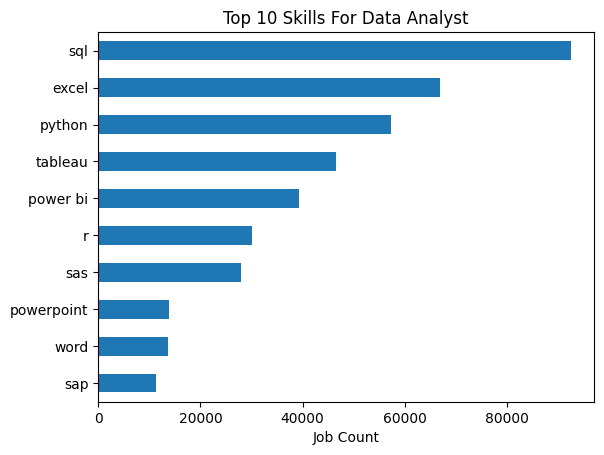

In [52]:

job_name = "Data Analyst"
amount =10

df_final_skills = df_skills_count[df_skills_count["job_title_short"] == job_name].head(amount)
df_final_skills.plot(kind = "barh",x = "job_skills",y = "skill_count")

plt.gca().invert_yaxis()
plt.title(f"Top {amount} Skills For {job_name}")
plt.xlabel("Job Count")
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()